In [27]:
import pandas as pd

df = pd.read_csv("MidtermActivity3_1DataSet.csv")
df

,Heating_Oil,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,132,6,74,4,23.8,4
1,263,10,43,4,56.7,4
2,145,3,81,2,28.0,6
3,196,9,50,4,45.1,3
4,131,2,80,5,20.8,2
...,...,...,...,...,...,...
1213,264,7,56,5,58.2,5
1214,129,5,78,1,22.5,1
1215,138,5,77,3,26.8,1
1216,156,3,89,2,34.0,2


In [28]:
data = pd.DataFrame(df[['Temperature', 'Heating_Oil']])
data

,Temperature,Heating_Oil
0,74,132
1,43,263
2,81,145
3,50,196
4,80,131
...,...,...
1213,56,264
1214,78,129
1215,77,138
1216,89,156


In [29]:
data.corr()

,Temperature,Heating_Oil
Temperature,1.00000,-0.77366
Heating_Oil,-0.77366,1.00000


INTERPRETATION: There is a strong negative correlation with a correlation coefficient of -0.77, meaning that as temperature increases, the usage of heating oil decreases, or as temperature decreases, the usage of heating oil increases.

In [30]:
import numpy as np

X = np.array(data[['Temperature']])
y = np.array(data[['Heating_Oil']])

print('Values of X:\n', X.shape)
print('Values of y:\n', y.shape)

Values of X:
 (1218, 1)
Values of y:
 (1218, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

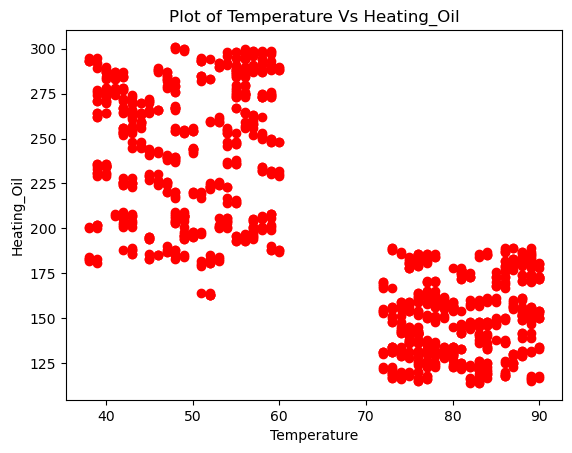

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.scatter(X, y, color = 'red')
plt.title('Plot of Temperature Vs Heating_Oil')
plt.xlabel('Temperature')
plt.ylabel('Heating_Oil')
plt.show

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [33]:
X_train.shape

(852, 1)

In [34]:
X_test.shape

(366, 1)

In [35]:
y_train.shape

(852, 1)

In [36]:
y_test.shape

(366, 1)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)
print(model)

LinearRegression()


In [38]:
y_test[:10]

array([[160],
       [266],
       [189],
       [253],
       [180],
       [298],
       [271],
       [168],
       [186],
       [289]])

In [39]:
y_test.shape

(366, 1)

In [40]:
y_pred = model.predict(X_test)
y_pred[:10]

array([[147.88069515],
       [239.45705157],
       [140.24933212],
       [254.71977764],
       [135.16175676],
       [214.01917479],
       [247.08841461],
       [178.40614729],
       [137.70554444],
       [219.10675015]])

In [41]:
y_pred.shape

(366, 1)

In [42]:
data['Predicted_Heating_Oil'] = model.predict(X)
data

,Temperature,Heating_Oil,Predicted_Heating_Oil
0,74,132,173.318572
1,43,263,252.175990
2,81,145,155.512058
3,50,196,234.369476
4,80,131,158.055846
...,...,...,...
1213,56,264,219.106750
1214,78,129,163.143421
1215,77,138,165.687209
1216,89,156,135.161757


In [43]:
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  [361.55886013]
Slope:  [[-2.54378768]]


In [44]:
from sklearn.metrics import r2_score

r2 = model.score(X_test, y_test)
print('Coeffiecient of determination: ', r2)
print('Coeffiecient of determination: {:.2f}'.format(r2))

Coeffiecient of determination:  0.5798288494573306
Coeffiecient of determination: 0.58


In [45]:
score = r2_score(y_test, y_pred)
print('Coeffiecient of determination: {}'.format(score * 100))
print('Coeffiecient of determination: {:.2f}'.format(score * 100))

Coeffiecient of determination: 57.98288494573306
Coeffiecient of determination: 57.98


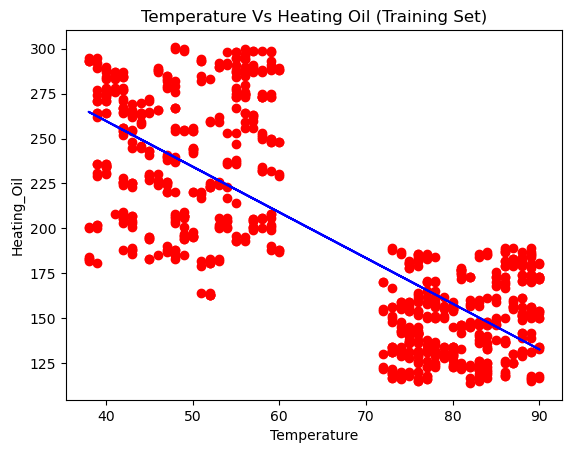

In [46]:
viz_train = plt
viz_train.scatter(X_train, y_train, color = 'red')
viz_train.plot(X_train, model.predict(X_train), color = 'blue')
viz_train.title('Temperature Vs Heating Oil (Training Set)')
viz_train.xlabel('Temperature')
viz_train.ylabel('Heating_Oil')
viz_train.show()

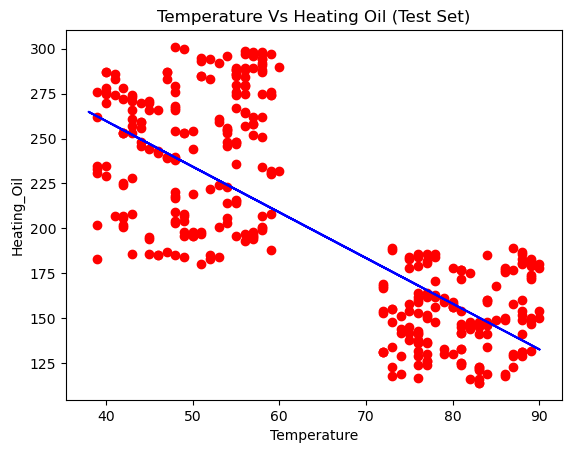

In [47]:
viz_test = plt
viz_test.scatter(X_test, y_test, color = 'red')
viz_test.plot(X_train, model.predict(X_train), color = 'blue')
viz_test.title('Temperature Vs Heating Oil (Test Set)')
viz_test.xlabel('Temperature')
viz_test.ylabel('Heating_Oil')
viz_test.show()